<a href="https://colab.research.google.com/github/emianaamos/Cotton-Disease-Classification/blob/main/Inception_Cotton_Disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'data/train'
valid_path = 'data/test'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('data/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 200 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 36 images belonging to 5 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  epochs=10,
  
)

C:\Users\Emiana Emmanuel\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
7/7 [==============================] - 51s 6s/step - loss: 6.5739 - accuracy: 0.3600
Epoch 2/10
7/7 [==============================] - 43s 6s/step - loss: 2.8864 - accuracy: 0.6050
Epoch 3/10
7/7 [==============================] - 50s 8s/step - loss: 1.6780 - accuracy: 0.7850
Epoch 4/10
7/7 [==============================] - 49s 6s/step - loss: 0.7044 - accuracy: 0.8700
Epoch 5/10
7/7 [==============================] - 47s 6s/step - loss: 0.9883 - accuracy: 0.8450
Epoch 6/10
7/7 [==============================] - 45s 6s/step - loss: 0.5349 - accuracy: 0.9300
Epoch 7/10
7/7 [==============================] - 43s 6s/step - loss: 0.2794 - accuracy: 0.9100
Epoch 8/10
7/7 [==============================] - 43s 6s/step - loss: 0.5083 - accuracy: 0.8900
Epoch 9/10
7/7 [==============================] - 42s 7s/step - loss: 0.3162 - accuracy: 0.9300
Epoch 10/10
7/7 [==============================] - 43s 6s/step - loss: 0.2239 - accuracy: 0.9500


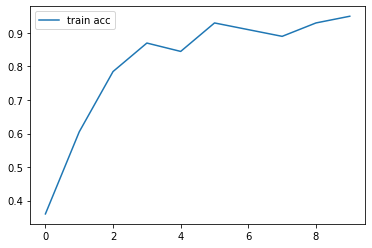

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
#plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:
y_pred = model.predict(test_set)
y_pred

array([[1.00000000e+00, 2.39568234e-16, 1.18731167e-08, 4.25251261e-22],
       [1.48262799e-07, 4.53633154e-16, 9.99999881e-01, 1.78257923e-20],
       [1.00000000e+00, 4.95247766e-11, 2.81227148e-08, 4.31369462e-17],
       [1.22210918e-06, 9.86664534e-01, 5.32279671e-07, 1.33336652e-02],
       [1.11646634e-02, 6.62530252e-13, 9.88835394e-01, 6.15077407e-21],
       [3.33285308e-03, 6.51823907e-12, 9.96667206e-01, 1.35533786e-21],
       [3.73586476e-01, 9.54356619e-06, 6.26401722e-01, 2.32597313e-06],
       [2.96165142e-22, 1.00000000e+00, 6.20954722e-30, 8.20779631e-28],
       [2.72548273e-09, 9.99998927e-01, 1.60839495e-13, 1.07385858e-06],
       [1.78304646e-04, 9.72729921e-01, 1.59078445e-05, 2.70758383e-02],
       [5.40884525e-12, 1.00000000e+00, 3.38116477e-14, 1.04228555e-08],
       [9.47440624e-01, 7.49461060e-06, 5.25485910e-02, 3.23536892e-06],
       [4.20990800e-05, 1.81498632e-01, 8.18458915e-01, 4.22857823e-07],
       [4.16346375e-05, 2.03401282e-06, 9.99956369e

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model=load_model('model_inception.h5')
img=image.load_img("C:/Users/Emiana Emmanuel/anaconda3/Scripts/Cotton Disease Classification/data/val/fresh cotton leaf/d (7)_iaip.jpg",target_size=(224,224))
img

In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x.shape

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a

In [ ]:
a==1